In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 불공정한 주사위의 확률분포
# 주사위가 가지는 값
x_set = np.array([1,2,3,4,5,6]) # x_set: 확률변수가 취할 수 있는 값의 집합

In [3]:
# 확률함수
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
# 확률변수 X
X = [x_set,f]

In [9]:
# 확률
prob = np.array([f(x_k) for x_k in x_set]) 
prob

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

In [10]:
dict(zip(x_set,prob)) # 딕셔너리로 zip, 묶어줌

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

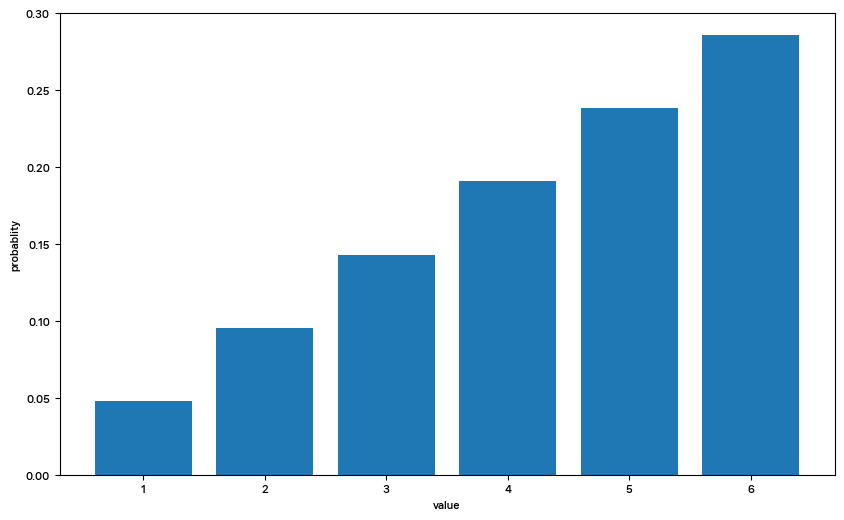

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probablity')
plt.show()

In [12]:
# 확률의 성질: 0 <= 확률값, 확률값의 총합은 1

In [13]:
np.all(prob >= 0)

True

In [14]:
np.sum(prob)

0.9999999999999999

In [15]:
# 누적분포함수 F(x): X가 x이하가 될 때의 확률을 반환하는 함수

In [16]:
def F(x):
    return np.sum([ f(x_k) for x_k in x_set if x_k <= x])  # f(): 각 숫자값에 대한 확률

In [17]:
F(3)

0.2857142857142857

In [19]:
# 확률변수의 변환: 확률변수X에 2를 곱하고 3을 더한 2X+3도 확률변수, 2X+3을 Y라고 하면

In [20]:
y_set = np.array([2*x_k+3 for x_k in x_set])
y_set

array([ 5,  7,  9, 11, 13, 15])

In [21]:
prob = np.array([ f(x_k) for x_k in x_set]) # 변환 전 확률분포와 같음, y로 안 구한 이유는 x로 파생되었기 때문..?
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [22]:
# 1차원 이산형 확률변수의 지표
# 기댓값: 확률변수의 평균

In [23]:
# 불공정한 주사위의 기댓값
np.sum([ x_k * f(x_k) for x_k in x_set]) 

4.333333333333333

In [28]:
sample = np.random.choice(x_set,100000000,p=prob) # 샘플이 커질수록 기댓값에 가까워잠
np.mean(sample)

4.33336698

In [29]:
def E(X,g=lambda x : x): # lambda x: 입력되는 값 리턴턴
    x_set,f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [30]:
X 

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [31]:
E(X)

4.333333333333333

In [32]:
E(X,g=lambda x: 2*x+3)

11.666666666666664

In [33]:
2*E(X)+3

11.666666666666666

In [34]:
# 분산

In [36]:
mean = E(X)
np.sum([ (x_k - mean )**2 *f(x_k) for x_k in x_set])

2.2222222222222223

In [40]:
def V(X, g = lambda x : x): # lambda: 한 줄짜리 일회용 함수
    x_set,f = X
    mean = E(X,g)
    return np.sum([ (g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [41]:
V(X)

2.2222222222222223

In [42]:
V(X,lambda x : 2*x+3)

8.88888888888889

In [44]:
2**2*V(X) # 분산의 공식: V(aX+b) = a**2V(X)

8.88888888888889

In [45]:
# 결합확률분포: 확률변수(X, Y)의 움직임을 동시에 고려한 분포
# 불공정한 주사위 A와 B: A와 B의 눈을 더한 것 X, A의 눈을 Y로 하는 2차원 확률분포
# X = 2-12, Y = 1-6
# 결합확률함수 식: y(x-y)/441

In [46]:
x_set = np.arange(2,13)
y_set = np.arange(1, 7)
x_set, y_set

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]))

In [59]:
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y*(x-y)/441
    else:
        return 0

In [60]:
XY = [x_set,y_set,f_XY]

In [61]:
# 확률분포의 히트맵

In [62]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

In [63]:
prob

array([[0.00226757, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00453515, 0.00453515, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00680272, 0.00907029, 0.00680272, 0.        , 0.        ,
        0.        ],
       [0.00907029, 0.01360544, 0.01360544, 0.00907029, 0.        ,
        0.        ],
       [0.01133787, 0.01814059, 0.02040816, 0.01814059, 0.01133787,
        0.        ],
       [0.01360544, 0.02267574, 0.02721088, 0.02721088, 0.02267574,
        0.01360544],
       [0.        , 0.02721088, 0.03401361, 0.03628118, 0.03401361,
        0.02721088],
       [0.        , 0.        , 0.04081633, 0.04535147, 0.04535147,
        0.04081633],
       [0.        , 0.        , 0.        , 0.05442177, 0.05668934,
        0.05442177],
       [0.        , 0.        , 0.        , 0.        , 0.06802721,
        0.06802721],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08163265]])

In [71]:
prob.shape

(11, 6)

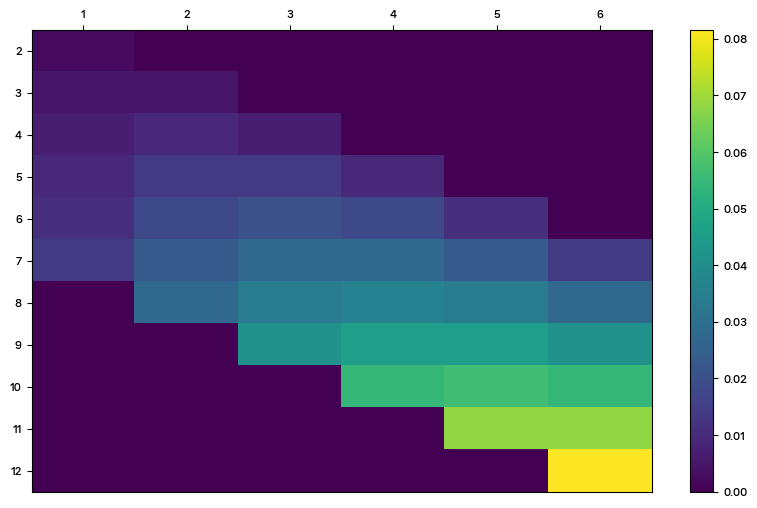

In [78]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5,minor = False)  # shape[1]:컬럼 수
ax.set_yticks(np.arange(prob.shape[0]) + 0.5,minor = False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
fig,colorbar(c,ax=ax)
plt.show()

In [80]:
np.all(prob >= 0)                                                                               

True

In [81]:
np.sum(prob)

1.0

In [85]:
# ------------------2차원 이산형

In [87]:
# 주변확률분포: 개별 확률변수에만 흥미

In [90]:
def f_X(x): # 확률변수 x의 움직임의 확률
    return np.sum([f_XY(x,y_k) for y_k in y_set]) # f_XY(x,y_k): x는 f_x(x)를 받고, y_k는 y_set을 받음

def f_Y(y): # 확률변수 y의 움직임의 확률
    return np.sum([f_XY(x_k,y) for x_k in x_set]) 

In [94]:
X = [x_set, f_X]
y = [y_set, f_Y]

In [96]:
prob_x = np.array([ f_X(x_k) for x_k in x_set])
prob_y = np.array([ f_Y(y_k) for y_k in y_set])

In [97]:
prob_x

array([0.00226757, 0.00907029, 0.02267574, 0.04535147, 0.07936508,
       0.12698413, 0.15873016, 0.1723356 , 0.16553288, 0.13605442,
       0.08163265])

In [98]:
prob_y

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

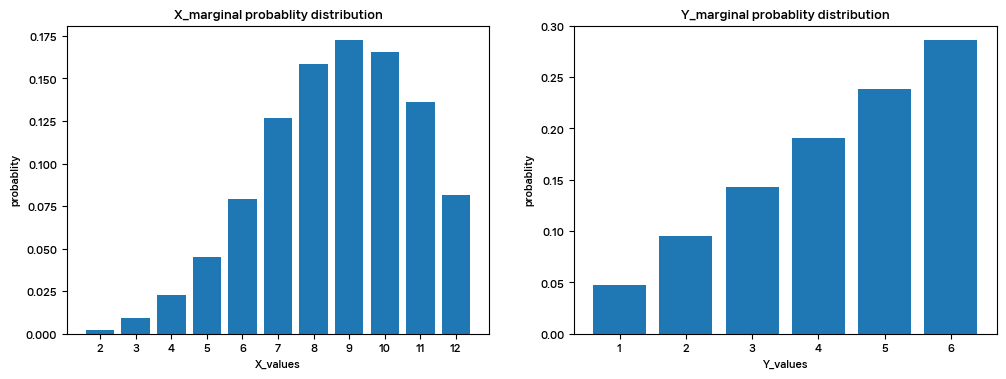

In [99]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probablity distribution')
ax1.set_xlabel('X_values')
ax1.set_ylabel('probablity')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probablity distribution')
ax2.set_xlabel('Y_values')
ax2.set_ylabel('probablity')
ax2.set_xticks(y_set)

plt.show()

In [100]:
# 기댓값

In [101]:
np.sum([ x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [102]:
np.sum([ y_j * f_XY(x_i,y_j) for y_j in y_set for x_i in x_set])

4.333333333333333

In [103]:
def E(XY,g):
    x_set, y_set, f_XY = XY
    return np.sum([ g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [104]:
mean_X = E(XY,lambda x,y : x)

In [106]:
mean_Y = E(XY,lambda x,y : y)

In [107]:
mean_X, mean_Y

(8.666666666666666, 4.333333333333333)

In [108]:
a,b = 2,3
E(XY,lambda x,y : a*x+b*y)

30.333333333333332

In [109]:
a*mean_X+b*mean_Y # E(ax+by) = aE(x)+bE(y)

30.333333333333332

In [111]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set]) # 분산

4.444444444444444

In [114]:
def V(XY,g):
    x_set,y_set,f_XY = XY
    mean = E(XY, g)
    return np.sum([np.sum([(g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])])

In [118]:
var_X = V(XY, g=lambda x,y : x)
var_X

4.444444444444444

In [119]:
var_Y = V(XY, g=lambda x,y : y)
var_Y

2.2222222222222223